# [GOLIVE](https://nsidc.org/data/NSIDC-0710) 

## A Jupyter notebook examining glacier speed from 2013 to 2019


> ***Citation: Scambos, T., M. Fahnestock, T. Moon, A. Gardner, and M. Klinger. 2016. Global Land Ice Velocity Extraction from Landsat 8 (GoLIVE), Version 1. Landsat 8 Path 63 Row 18 all times. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5ZP442B. Data accessed: November 2018 -- January 2019++***


### Bibliography

- [Nature paper on Himalayan speeds by Dehecq and others](https://www.nature.com/articles/s41561-018-0271-9)
- [Scott's GitHub gist on least squares fit to time in xarray](https://gist.github.com/scottyhq/8daa7290298c9edf2ef1eb05dc3b6c60)
- [Scott's blog on pangeo NDVI](https://medium.com/pangeo/cloud-native-geoprocessing-of-earth-observation-satellite-data-with-pangeo-997692d91ca2)
- [Scott's corresponding NDVI Binder](http://binder.pangeo.io/v2/gh/scottyhq/pangeo-example-notebooks/landsat-cog?urlpath=lab/tree/landsat8-cog-ndvi.ipynb)
- [Scott's HIMAT Webinar](http://wiki.esipfed.org/index.php/Interoperability_and_Technology/Tech_Dive_Webinar_Series#14_Feb_2019:_.22Cloud_Native_Geoprocessing_of_Earth_Observation_Satellite_Data_with_Pangeo.22:_Scott_Henderson_.28University_of_Washington.29)
- [Andrew Tedstone remark on counting occurrences in xarray/dask](http://atedstone.github.io/count-with-xarray/)
- [pangeo](http://pangeo.io)
- [NASA panoply NetCDF explorer](https://www.giss.nasa.gov/tools/panoply/)


<img src="pangeo.png" alt="drawing" width="500"/>


### Overview


The science objective here is twofold: Where and when is valley glacier ice flowing at uncharacteristic speeds?
And: Is the moderate-term (six year) trend in valley glacier ice speed consistent with our current understanding of
mass balance trends? 


To make progress we assume a merely rudimentary understanding of data formats and manipulation tools. These
golive notebooks are consequently tutorials on bootstrapping skills, specifically with geospatial Python.


#### golive Jupyter notebooks


These notebooks *golive*, *golive2* and *golive3* demonstrate working with a moderately large geospatial dataset,
the Global Land Ice Velocity Extraction data aka [**GOLIVE**](https://nsidc.org/data/NSIDC-0710). In passing we
also demonstrate bootstrapping Python file transfer over *ftp*, chart plotting, xarray and dask in relation to
NetCDF-format files, and the pangeo platform. As we proceed with the main narrative some digressive material is
relegated to the supporting *golive_supplement* notebook.


You can safely run the cells here in sequence. Cells that are compute-intensive are by default disabled
for example by means of `if False:`. This applies for example to large ftp file transfers. 


Some cells rely on pre-installed packages as implied by the first 'utility code' cell for example. Much 
of this is pre-installed on the Port Cormorack Jupyter Hub; and some additional installs (e.g. *utm*) 
are invoked using `!pip install`. 


#### GoLIVE data

The [GoLIVE data selection interface](https://nsidc.org/app/golive) hosted at NSIDC provides
a view of many overlapping Path/Row frames in our region of interest, southeast Alaska.
The glacier ice of this region moves with surface speed on the order of a few meters per day
in the glacier center, reducing to near-zero at glacier margins.


The source data files give speed of ice on glaciers in meters per day at 300-meter postings across
the Landsat frame. These speeds are derived by correlating surface features between two viewings. 
For **golive** purposes Landsat repeat-viewings come in multiples of 16 days and are carried out 
all the way from 16 days to 32, 48, 64, 80 and 96 days. Often these comparisons are not possible
due to clouds. For more on Landsaat 8: 

- [Wikipedia on Landsat 8](https://en.wikipedia.org/wiki/Landsat_8), 
- [USGS on Landsat 8](https://landsat.usgs.gov/landsat-8) and
- [NASA on Landsat 8](https://landsat.gsfc.nasa.gov/landsat-8/mission-details/) web pages.



#### NASA, GoLIVE and ITS LIVE


* NASA has a system called EOSDIS where datasets are provided by domain centers called DAACs
* NSIDC hosts a cryosphere DAAC...
  * ...but the GOLIVE data are not technically 'within' the DAAC
  * ...rather GOLIVE is provided by NSIDC as a somewhat independent resource
* The DAACs in turn are unified under a NASA discovery mechanism called the Common Metadata Repository (CMR)
* The GOLIVE successor project ITSLIVE will be available through the CMR via affiliation with NASA MEaSUREs
  * More on [MEaSUREs](https://earthdata.nasa.gov/community/community-data-system-programs/measures-projects)
* Question: Can the geoscience community improve this machinery for discoverability and use?
  * Notebooks like this are intended to help


#### Remarks on data discovery


The NASA CMR shows NSIDC as a DAAC with (Dec 2018) 343 collections (a fascinating list).
However GoLIVE is not among them; that is GoLIVE is not discoverable via CMR/GIBS.  This point
should become moot when ITSLIVE -- a superset of GoLIVE -- appears in CMR.
 
 
The 'word of mouth' nature of certain datasets is often decried as lost opportunity. GoLIVE certainly 
falls in that category by not being available in the CMR, for perhaps both top-down and bottom-up
historical reasons. First there seems to be no top-down mechanism in place to couple NASA machinery to Principle 
Investigator-supplied data. Secondly bottom-up or grass roots discoverability paths for bespoke datasets 
are also not established at the individual NASA DAACs.   


GoLIVE is novel as a data resource: A large-scale PI-sourced dataset processed at NSIDC. 
Anticipating DAAC compatibility the GoLIVE data products are nominally HDF5 netCDF4 CF 1.6
compliant; although the analysis given here raises some questions on this point. 


GoLIVE was funded as a NASA cryosphere research proposal: Successfully completed but with an 
indeterminate future. As of January 2019: There are nominal continuing costs associated with 
processing, storage and access mechanisms for GoLIVE that are not resolved. 


As noted GoLIVE will be succeeded by a new 
[MEaSUREs](https://earthdata.nasa.gov/community/community-data-system-programs/measures-projects)
product called the Inter-Mission Time Series Land Ice Velocity and Elevation (ITSLIVE) project.
Noting that this will add surface elevation data, **ITS LIVE** is entering its first year and 
will span many observing platforms.  Velocities will be produced, for example, from the complete 
available Landsat sequence (4,5,7, 8, possibly 9), and elevations will be produced from 
Synthetic Aperture Radars including [Sentinal S1A/B/C/D](https://en.wikipedia.org/wiki/Sentinel-1).  
Postings will be registered to a common grid to facilitate time-series comparison across sensors. 
Via MEaSUREs this effort will incorporate into the NASA DAAC/EOSDIS structure.



#### The program for these **golive** notebooks


* Learn about GoLIVE 'somehow' (word of mouth discovery method)
* Arrive thereby at the [**GoLIVE** home page](https://nsidc.org/data/NSIDC-0710)...
  * and the [**GoLIVE** map interface](https://nsidc.org/app/golive)
* Select a region as a Landsat 8 Path-Row frame and arrive at the corresponding ftp server URL
* Proceed at the hundreds of meters / limited times glacier transect scale
  * List available `png` files; file size is a proxy for good data coverage 
  * Download 'good data' results, 2013 to present
  * Deconstruct NetCDF files as xarray Datasets containing DataArrays 
  * Produce a set of transect speed profiles in time series (this notebook)
* Proceed at the Landsat-8 frame and full time-sequence scale (**xarray/dask**)
  * golive2 notebook
* Proceed at the six-frame (single UTM zone) full time-sequence scale (**pangeo**)
  * golive3 notebook
  

#### Style elements

* This notebook follows a fairly direct narrative with digressions relegated to the 
**golive_supplement** notebook. 


* These cells run quickly and (de novo) fail. This is to avoid starting massive data
transfers for the casual viewer who runs the wrong cell with Shift - Enter. To reproduce 
what this notebook does correctly: Activate data harvesting cells as necessary. 

 
## 1. take stock of a retrieved dataset 

### Location: southeast Alaska, Landsat 8 Path 63 Row 18


The science motivation here is simply 'What sort of variability in glacier speed is 
to be found in the data?' 


> *Abstract*
>
> 
> Region-wide variability in glacier speed should have discernible cause. For a time and location window 
> provided by **GOLIVE** we assess patterns in glacier speed on scales from 100 meters to 200 km. 
> Normalized variability should (null hypothesis) be moderated by observables, particularly precipitation 
> and temperature as they moderate bed conditions. 
> 


The following cell:

- sets up inline graphics via matlab
- ensures the `utm` and `pygeotools` packages are installed in this environment
- imports a set of useful packages
- imports a set of utility methods from the local file `golive_utility.py`
  - these are subsequently referenced using a `g.` prefix

In [44]:
%matplotlib inline

!pip install utm
!pip install pygeotools

import timeit
from datetime import timedelta, datetime
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import xarray as xr
import dask
import numpy as np
from numpy import datetime64 as dt64, timedelta64 as td64
from scipy import stats
from scipy.signal import medfilt as mf
from random import randint as ri
from ftplib import FTP

from ipywidgets import *                # interactivity
from traitlets import dlink             # interactivity
import sys
import os
import utm

# from osgeo import gdal 
# from pygeotools.lib import iolib,timelib

import golive_utility as g

#### utility work

Above we imported the golive_utility as 'g'. It resides in a local Python text file `golive_utility.py`. 
One of its methods is 'dirnou' which is short for 'directory, no underscore' because I was tired of seeing
long lists of `._methods` and `.__methods`.  
Let's use that method to list the useful methods of the golive_utility code. Two additional remarks: 

- Two `golive_utility` methods are about displaying images but this can be done as well from markdown using this format: 

<img src="seward_timeseries.png" alt="drawing" width="600"/>

- We can regard `golive_utility.py` as a first step on the path to publishing domain-specific open code.


In [45]:
g.dirnou(g)      

['GetGoliveMeridian',
 'SetDataDirectory',
 'ShowGitHubImage',
 'ShowLocalImage',
 'dirnou',
 'lsal']

In [46]:
# This cell looks in the ~/data/golive directory to list data files that have been downloaded
#   already. They are present due to prior efforts. If they are not present: Subsequent cells 
#   cover how to download them from NSIDC
golive_d = g.SetDataDirectory('golive_big')
fl = g.lsal(golive_d)
flnc16 = g.lsal(golive_d + '/L8_063_018_016*.nc')
print(len(flnc), 'netcdf files')
# to see everything:
# for f in fl: print(f.split()[8])

52 netcdf files


In [47]:
# Run this cell to retrieve the data files from NSIDC
#   The golive_d local destination directory must already exist
#   This cell begins with 'if False' so it does not run accidentally (it takes awhile)
#   The criterion for which files to pull can be based upon parsing the filenames which begin:
#     L8_PPP_RRR_DDD_Y1_JD1_Y2_JD2... where
#       L8 is verbatim, means 'LANDSAT8'
#       PPP is Path number
#       RRR is Row number (Path + Row give a consistent location for the frame)
#       DDD is the difference in days between two source images (some multiple of 16 days)
#       Y1 is the year of the first image
#       JD1 is the Julian day of the first image
#       Y2 is the year of the second image
#       JD2 is the Julian day of the second image
#       ...and the remaining characters are file history / version details plus file extension
if False:
    
    # Let's fire up an ftp Client
    #   This allows us to connect anonymously to the GoLIVE server and get data.
    #   Running this cell may take a few minutes.
    ftp = FTP('dtn.rc.colorado.edu')
    ftp.login()    # with no arguments this is a 'anonymous ftp'

    # I located this source data directory by using the GoLive browser interface; link is https://nsidc.org/app/golive
    # Path 64 row 18 or path 63 row 18 (a bit further east) both cover the Bering Glacier and associated. I will
    # stick with Path 63 as this also includes Malaspina.
    ftp.cwd('work/nsidc0710/nsidc0710_landsat8_golive_ice_velocity_v1.1/p063_r018')
    a=[]
    ftp.dir(a.append)    # This is a rather tricky line of Python as it passes an append method as an argument

    print(len(a), 'source files')             # expect 765+ entries... observed Dec 2018
    print(a[1].split())
    nFiles = len(a)
    nData = int(nFiles / 3)                   # we expect three files per dataset: .nc, .png and .tif in that order

    count = 0
    s = []
    for l in a:
        b = l.split()
        c = b[8].split('.')
        if c[-1] == 'png': s.append(int(b[4]))   # file size

    print('largest png image file is', int(max(s)/1000), 'MB (data volume vs no-data)')

    
    # originally this minimum was set at like 3MB to try and get 'data-rich' results only
    # however a less biased approach is "let's get everything there and just run with it"
    minPngSize = 0                        # arbitrary cutoff for a decent amount of data
    
    
    for i in range(nData):
        print('considering file', i, 'of', nData, 'with png size', s[i])
        if s[i] > minPngSize:                  # imposes the requirement that source png file > minPngSize
            ncIndex = i*3                      #   files 0, 3, 6 etc will be the netcdf files we want 
            pngIndex = ncIndex + 1
            tifIndex = ncIndex + 2
            lineWeWant = a[ncIndex].split()
            fileWeWant = lineWeWant[8]
            print('considering ' + fileWeWant)
            # ftp.retrlines('LIST ' + fileWeWant)
            ftp.retrbinary('RETR ' + fileWeWant, open(golive_d + fileWeWant, 'wb').write)
    
            lineWeWant = a[pngIndex].split()
            fileWeWant = lineWeWant[8]
            print('    considering ' + fileWeWant)
            # ftp.retrlines('LIST ' + fileWeWant)
            ftp.retrbinary('RETR ' + fileWeWant, open(golive_d + fileWeWant, 'wb').write)    
    
            lineWeWant = a[tifIndex].split()
            fileWeWant = lineWeWant[8]
            print('    considering ' + fileWeWant)
            # ftp.retrlines('LIST ' + fileWeWant)
            ftp.retrbinary('RETR ' + fileWeWant, open(golive_d + fileWeWant, 'wb').write)    
    
    
    ftp.quit()
    

In [48]:
# This cell builds some filename lists and so on from the 'ls -al' results in fl[]
#   The days-interval for each is noted also (again a multiple of 16 up to 96 days) 
#   together with the year and day of the first of the two source images.
fnc=[]
fpng=[]
ftif=[]
dur=[]
year=[]
doy=[]
for x in fl:
    sp = x.strip().split()
    if len(sp) == 9:
        # capture out only the 16-day interval data
        if sp[8][-3:] == '.nc' and sp[8][11:14] == '016': 
            fnc.append(golive_d + sp[8])
            dur.append(int(fnc[-1].split('_')[3]))
            year.append(int(fnc[-1].split('_')[4]))
            doy.append(int(fnc[-1].split('_')[5]))
        elif sp[8][-4:] == '.png' and sp[8][11:14] == '016': 
            fpng.append(golive_d + sp[8])
        elif sp[8][-4:] == '.tif' and sp[8][11:14] == '016':
            ftif.append(golive_d + sp[8])
        else: 
            print('non-data file noticed:', sp[8])
            
print('Here are the first three files:')
print('  ', fnc[0])
print('  ', fpng[0])
print('  ', ftif[0])
print('...from year', year[0], 'day', doy[0])

non-data file noticed: .
non-data file noticed: ..
non-data file noticed: fubar
Here are the first three files:
   /home/jovyan/data/golive/L8_063_018_016_2013_143_2013_159_v1.1.nc
   /home/jovyan/data/golive/L8_063_018_016_2013_143_2013_159_v1.1.png
   /home/jovyan/data/golive/L8_063_018_016_2013_143_2013_159_v1.1.tif
...from year 2013 day 143


First file: year 2013 day 143


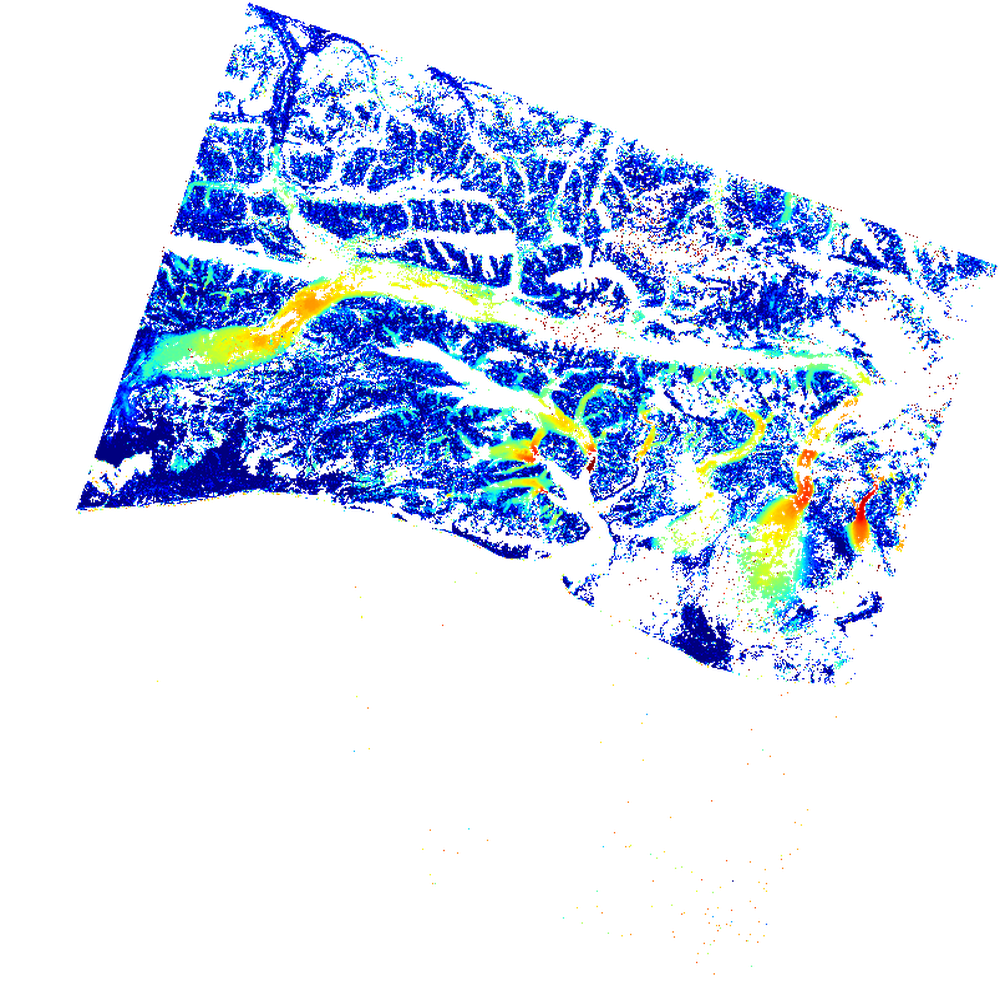

In [49]:
# This uses the .png file. Can substitute the .tif file; and in this case it appears identical
#   The image indicates how the data are generally rather sparse. White is 'no match'. 
#   Incidentally if this happens to be year 2013 day 143 there is a glacier caught surging 
#     at the lower right part of the image; a small glacier just east of Seward glacier. 
index = 0                   
print('First file: year', year[index], 'day', doy[index])
g.ShowLocalImage('', fpng[index], 1000, 1000)

In [50]:
print(fnc[0])                # print the first NetCDF data file name

/home/jovyan/data/golive/L8_063_018_016_2013_143_2013_159_v1.1.nc


In [51]:
n16s = dur.count(16)    # counts occurrences of '16' in the day-duration list

# This opens each .nc data file as a separate xarray Dataset appended to list m[]
#   This is poor / naive practice since we can open all 52 .nc files as a single
#   Dataset using xr.open_mfdataset(). However this requires some additional 
#   finesse so that approach will be adopted in a subsequent notebook.

m = [xr.open_dataset(f) for f in fnc if int(f.split('_')[3]) == 16]
year = [f.split('_')[4] for f in fnc if int(f.split('_')[3]) == 16]
doy = [f.split('_')[5] for f in fnc if int(f.split('_')[3]) == 16]
    
print('There are', n16s, 'results from 16-day image pairs available\n')
print('first few respective years:', year[0:2], 'up to', year[-1])

# We now have Xarray datasets m[0], m[1], ... , m[5] with a decent number of good values
#   As an aside: xr.open_mfdataset() is intended to open multiple files as a single dataset.
#   This is not done here but it is addressed in the golive2 and golive3 notebooks.

There are 52 results from 16-day image pairs available

first few respective years: ['2013', '2013'] up to 2019


## 2. access data


This section explores the NetCDF files, representing them as a list of **xarray** DataSets `m[]`
for the 16-day-interval results. How to deconstruct these to 'get at' usable numbers 
(glacier speeds for example)?

- Dates involved?
- Coordinates? 
- Data units? Density? Quality? Retrieve velocity profiles at a particular location?
- How do we avoid considering bad data as good data? 
- How to build a time-series visualization?


To begin with simply naming the DataSet produces a nice text description.

In [52]:
m[0]

<xarray.Dataset>
Dimensions:                                         (chars: 4280, x: 803, y: 786)
Coordinates:
  * x                                               (x) float64 3.373e+05 ... 5.779e+05
  * y                                               (y) float64 6.779e+06 ... 6.544e+06
  * chars                                           (chars) int32 0 1 ... 4279
Data variables:
    image_pair_times                                |S1 ...
    input_image_details                             |S1 ...
    transverse_mercator                             |S1 ...
    offset_correction                               |S1 ...
    applied_bilinear_x_offset_correction_in_pixels  (y, x) float32 ...
    applied_bilinear_y_offset_correction_in_pixels  (y, x) float32 ...
    vx                                              (y, x) float32 ...
    vy                                              (y, x) float32 ...
    vv                                              (y, x) float32 ...
    vx_masked         

In [53]:
meridian = g.GetGoliveMeridian(m[0])
print('The reference meridian for this UTM zone is', meridian, 'degrees longitude.')

The reference meridian for this UTM zone is -141 degrees longitude.


#### coordinates

In the cell above the method `g.GetGoliveMeridian()` is an other example of domain or task-specific code in action. 


The GOLIVE data are in (y, x) transverse mercator coordinates (in meters). The y-coordinate is **northing**,
x-coordinate is **easting**. Let's check on some 
[UTM coordinates](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system)
on Seward glacier to verify lat/lon correspondence. For reference: [Here is an online UTM calculator.](https://www.latlong.net/lat-long-utm.html)

In [54]:
# This gives us Northing, Easting, longitudinal band 7, and latitude band 'V'
#   There are 60 longitude bands, each 6 degrees; and 20 latitude bands, each 8 degrees.
#   For a few additional pathologies please see the Wikipedia article referenced above.
utm.from_latlon(60.15, -140.45)

(530538.5079323711, 6668243.670375315, 7, 'V')

In [55]:
utm.to_latlon(530538.5079323711, 6668243.670375315, 7, 'V')

(60.150000005547355, -140.44999999728375)

####  Seward glacier transects

Seward Glacier is the primary source of ice feeding into the Malaspina (piedmont lobe) glacier. Seward
consistently shows relatively fast motion flowing along a sinuous path from north to south on the 
eastern side of the image, for example at latitude 60.15 deg N, longitude -140.45 deg W.



#### more about the Dataset list `m[ ]` 

The next cell prints some data variables from the first of the six datasets `m[0]`. The
code references four data variables `vv`, `vv_masked`, `corr` and `lgo_mask`. The subsequent square brackets
use a simple tuple of ranges in the manner of a numpy 2D array to pull three values. The final qualifier 
`values` gives actual data rather than describing the nature of the DataArray. (Remove `.values` to see this in action.)

In [56]:
print(m[0]['vv'][493,648:653].values)             # straightforward speeds
print(m[0]['vv_masked'][493,648:653].values)      # masked speeds: Improved by a quality control check
print(m[0]['corr'][493,648:653].values)           # correlation values for the speed calculation
print(m[0]['lgo_mask'][493,648:653].values)       # mask values

[ 0.61901057  2.9667873   0.63096374  0.28799492 32.37187   ]
[      nan 2.9667873       nan       nan       nan]
[0.62321174 0.6002391  0.47392198 0.46754846 0.448105  ]
[0. 0. 0. 0. 0.]


#### observations on these data values

* The third speed given in the first line is 32 meters per day. This is too fast to be correct.
  * very likely this results from a false correlation between the two Landsat 8 source images
  * this source of noise can be either ignored or subjected to additional filtering
* Comparing `vv` to `vv_masked` we see that all but one of the `vv` values is maksed out as a `nan`
* **lgo** stands for **land/glacioer/ocean** so it is a terrain mask
  * the `lgo_mask` array has 3 possible values: '0' for glacier, '1' for non-glacier and '2' for ocean

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1.]]


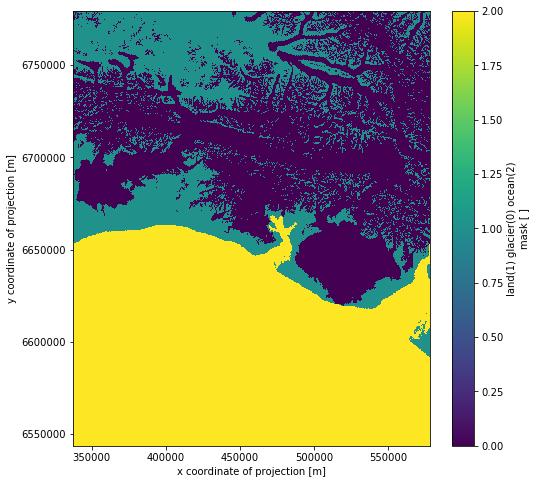

In [57]:
# the lgo_mask variable shows ice (0), land(1) and ocean(2)
print(m[0]['lgo_mask'][0:5,0:5].values)
m[0].lgo_mask.plot(figsize=(8,8))              # an xarray dataset includes a native .plot() method

m[2] is of type <class 'xarray.core.dataset.Dataset'>
.vv_masked is of type <class 'xarray.core.dataarray.DataArray'>
.plot() is of type <class 'xarray.plot.plot._PlotMethods'>


(6630000, 6694000)

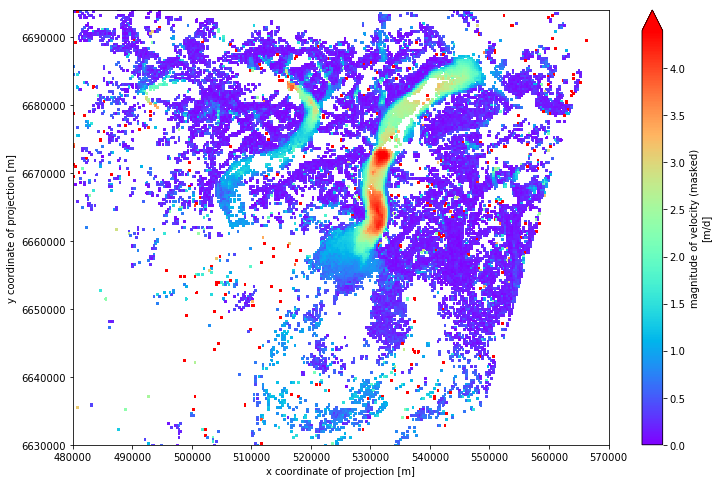

In [58]:
# Here we switch from Dataset m[0] to Dataset m[2] which is a little bit sparser.
# UTM coordinate y's are in the 6.6 million range, the x's are in the 500,000 range.
# A little trial-and-error produced the cropped view shown below: Speeds around Malaspina/Seward/Agassiz Glaciers
# We use the `.plot()` sub-method intrinsic to the `.vv_masked` attribute of `m[2]`. 
#   Since this composition is a bit mysteriouis let's first print some types so we know what is what...

print('m[2] is of type', type(m[2]))
print('.vv_masked is of type', type(m[2].vv_masked))
print('.plot() is of type', type(m[2].vv_masked.plot))

minSpeed, maxSpeed = 0.0, 4.4
m[2].vv_masked.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=minSpeed, vmax=maxSpeed) # rainbow > bwr blue-white-red

# These next two lines invoke pyplot which is aliased to 'plt'
# center on Seward and Malaspina glaciers. Glacier west of Seward is Agassiz.
plt.xlim(480000,570000)
plt.ylim(6630000,6694000)

#### time

In [59]:
# From the self-description of m[] we see an attribute 'image_pair_times'. This in NetCDF language is a 
#   Data variable (in contrast to coordinates, dimensions and metadata Attributes). Treated in isolation
#   it is of type DataArray; which means that it has its own Attributes which can be printed like so:
m[2]['image_pair_times']

<xarray.DataArray 'image_pair_times' ()>
array(b'', dtype='|S1')
Attributes:
    del_t:                    16.0
    del_t_units:              days
    del_t_speed_units:        m/d
    start_time_decimal_year:  2013.87123288
    mid_time_decimal_year:    2013.89315068
    end_time_decimal_year:    2013.91506849
    start_date:               2013-11-15T00:00:00
    mid_date:                 2013-11-23T00:00:00
    end_date:                 2013-12-01T00:00:00

In [60]:
# ok let's just get the start_date attribute
m[2]['image_pair_times'].start_date

'2013-11-15T00:00:00'

In [61]:
# Next we'd like to go from text fields in the Xarray Attributes to actual Python time values 
#   so we can do time calculations. A good test is to subtract two times to be sure this works properly.
# For time: Python datetimes work via conversion using 'string parse time' abbreviated 'strptime'
from datetime import datetime
d0 = datetime.strptime(m[2]['image_pair_times'].start_date, '%Y-%m-%dT%H:%M:%S')
d1 = datetime.strptime(m[2]['image_pair_times'].end_date, '%Y-%m-%dT%H:%M:%S')
print(d0)
print(d1)
print('interval is', d1 - d0)

2013-11-15 00:00:00
2013-12-01 00:00:00
interval is 16 days, 0:00:00


#### the ipyleaflet map

plotting data (as above) suggests bringing in a map; for example for generating transects of interest by hand
and verifying that data are located as intended. This is currently flag not working on the NASA pangeo JHub. 

In [62]:
# print(fpng[0].split('/')[5])

In [63]:
from ipyleaflet import WMSLayer
from ipyleaflet import (Map, Marker, MarkerCluster,
    TileLayer, ImageOverlay, Polyline, Polygon, Rectangle, Circle, CircleMarker,
    Popup, GeoJSON, DrawControl, basemaps, Velocity, basemap_to_tiles)

from ipywidgets import Label

# The native map layer has admirable resolution down to building outlines
gmap = Map(center=(60.17567228194297, -141.33636474609378), zoom=8)


# This abandons the native map:
# gmap.clear_layers()

# This defines the working zoom levels (I believe)
# gmap.interact(zoom=(4,15,1))

# This adds a map layer with less resolution but it features both shaded relief and iso elevation lines
# gmap.add_layer(basemaps.Esri.DeLorme)

# An example of creating a Web Mapping Service map layer
# ...roads, water bodies, and buildings 
# wms = WMSLayer(url='https://ows.terrestris.de/osm/service', layers='OSM-Overlay-WMS', tile_size=512)
# gmap.add_layer(wms)

# Hardcoded: Requires a relative, not absolute path to this file
# io = ImageOverlay(url='../data/golive/' + fpng[0].split('/')[5], bounds = gmap.bounds, opacity = 0.5)
io = ImageOverlay(url='../data/golive/L8_063_018_016_2013_143_2013_159_v1.1.png', bounds = gmap.bounds,  opacity = 0.5)
gmap.add_layer(io)
# Use (2-finger) zoom + slide map manipulation to fix the overlay ad hoc

# g = GeoJSON(data=ftif[2])
# velocity = Velocity(data=m[2])

# This works quite well...
# nasa_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2018-04-08");
# gmap.add_layer(nasa_layer);

In [64]:
# Coregistration note: Attaching an image layer with bounds = gmap.bounds and semi-opacity permits one to move the map
#   under the overlay until features match. Using a readout (see below) would facilitate registering the overlay to 
#   geographic coordinates. 

# Issuing 'gmap' as the last line of the cell brings it up
# Coregister the overlay image by hand if it is offset
#   Use one finger to move map + overlay
#   Use two fingers to resize and slide map to match the overlay
gmap

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [65]:
# This label widget gives a read-out of the coordinate of the mouse cursor
label = Label('----coordinates on map----'); display(label)

def handle_interaction(**kwargs): 
    coordsplit = str(kwargs.get('coordinates')).split()
    coordlat = coordsplit[0].lstrip('[').rstrip(',')
    coordlon = coordsplit[1].rstrip(']')
    coordutm = utm.from_latlon(float(coordlat), float(coordlon))         # returns 4-element tuple northing easting zone-lon zone-lat
    coordlabel = coordlat + ' ' + coordlon
    coordlabel += ' or in UTM: ' + str(coordutm[0]) + ' ' + str(coordutm[1]) + ' ' + str(coordutm[2]) + ' ' + coordutm[3]
    label.value = coordlabel
    
gmap.on_interaction(handle_interaction)

Label(value='----coordinates on map----')

In [66]:
# on the pangeo JHub the overlay is not appearing flag
# These diagnostics ought to (but do not) give a view into the map control
# g.dirnou(gmap)
# g.dirnou(gmap.layers[1])
# print('\n\n')
# gmap.layers[1].get_state
# print('\n\n')
# gmap.get_state

### Concluding part 2

Have...

* a map 
* coordinate access (utm conversion)
* data mask
* time  
* time series of both data (velocities) and correlation quality
  * speed-as-temperature plot

Need...

* indexing by nearest coordinates 
* a handle on xarray DataSet / DataArray manipulation
  * cf [this Geohackweek link](https://geohackweek.github.io/nDarrays/02-xarray-architecture/)
  * emphasis: xarray DataArrays are extensions of the numpy nDarray n-dimensional array. 
    * 'Extension' in the sense that they have labeled dimensions and coordinates. 
    * gets away from indexing arrays by integers: 0, 1, ..., dim-1.
  * and cf [xarray DataArray official documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html)


The xarray Dataset has four components: `x.dims`, `x.values`, `x.coords`, `x.attrs`; the latter being an ordered dictionary of metadata. The xarray DataArray is similar with the addition of a `name`... anyway this could use a little flag elaboration.


## Part 3 data visualization and analysis


This section extends data access to interpretation. The key will be the `.nearest()` indexing qualifier 
to translate lat/lon locations to locations of data in a source xarray Dataset where the data are 
indexed in terms of UTM northing/easting. 

Our objective in this section will be to produce a set of speed transects across 
Seward glacier plus a longitudinal speed profile across Malaspina. In all cases across the 
52 available 16-day interval solutions. 

In [67]:
# example of .nearest() to access a speed data value
northing = 6637657.5
easting = 528142.5
a = m[0]['vv_masked'].sel(y=northing, x=easting, method='nearest')
a.values

array(0.48326758)

In [68]:
# some transects on Seward Glacier and a longitudinal transect across Malaspina piedmont
#   These coordinates were determined by hand; it would be much better to implement a nice map control
#   to generate them using a point/click interface. 

TEndpoints = []       # transect endpoints: Four across Seward, one longitudinal on Malaspina

TEndpoints.append(((60.104166,-140.478055),(60.079166,-140.421944)))
TEndpoints.append(((60.150833,-140.494444),(60.14611,-140.400277)))
TEndpoints.append(((60.189722,-140.456388),(60.17083,-140.389722)))
TEndpoints.append(((60.242222,-140.417500),(60.21805,-140.300277)))
TEndpoints.append(((60.066388,-140.510555),(59.726944,-140.580555)))

nT = len(TEndpoints)

utm0 = []
utm1 = []
for i in range(nT):
    utm0.append(utm.from_latlon(TEndpoints[i][0][0], TEndpoints[i][0][1]))
    utm1.append(utm.from_latlon(TEndpoints[i][1][0], TEndpoints[i][1][1]))

# utm0/1 values are 4-plets for the two endpoints of each transect, each 4 - 40 km in length
# Data posting is nominally 240 meters. We'll over-sample this a bit with 100 meter postings.
from numpy.linalg import norm
posting = 100.

# tr = transect vector across the glacier; tl = transect length; tp = posting-length transect vector
tr  = [(utm1[i][0]-utm0[i][0], utm1[i][1]-utm0[i][1]) for i in range(nT)]
tl  = [norm(tr[i]) for i in range(nT)]
tp  = [tr[i]/tl[i]*posting for i in range(nT)]
nps = [int(tl[i]/posting) + 1 for i in range(nT)]


print(utm0, '\n')       # notice these 4-tuples are (easting, northing, lon-band, lat-band)
print(tr, '\n')
print(tl, '\n')
print(tp, '\n')
print(nps, '\n')
print(tr, '\n')
print(tl, '\n')
print(tp, '\n')
print(nps, '\n')

[(529021.1110697987, 6663126.611153034, 7, 'V'), (528070.0981115395, 6668316.724012578, 7, 'V'), (530147.4105949326, 6672664.497006416, 7, 'V'), (532252.417105228, 6678529.731215285, 7, 'V'), (527245.2259248154, 6658905.556669951, 7, 'V')] 

[(3144.1744930562563, -2758.1968929581344), (5233.141818051343, -482.24623928405344), (3716.5123229203746, -2071.6535719921812), (6518.903660722659, -2628.9233719613403), (-3657.135517305869, -37828.78888074588)] 

[4182.521170670804, 5255.314902376576, 4254.904507596729, 7029.03571149186, 38005.156339317735] 

[array([ 75.17414413, -65.94579634]), array([99.57808267, -9.17635286]), array([ 87.3465507 , -48.68860319]), array([ 92.74250307, -37.40091073]), array([ -9.6227351 , -99.53593808])] 

[42, 53, 43, 71, 381] 

[(3144.1744930562563, -2758.1968929581344), (5233.141818051343, -482.24623928405344), (3716.5123229203746, -2071.6535719921812), (6518.903660722659, -2628.9233719613403), (-3657.135517305869, -37828.78888074588)] 

[4182.521170670804, 

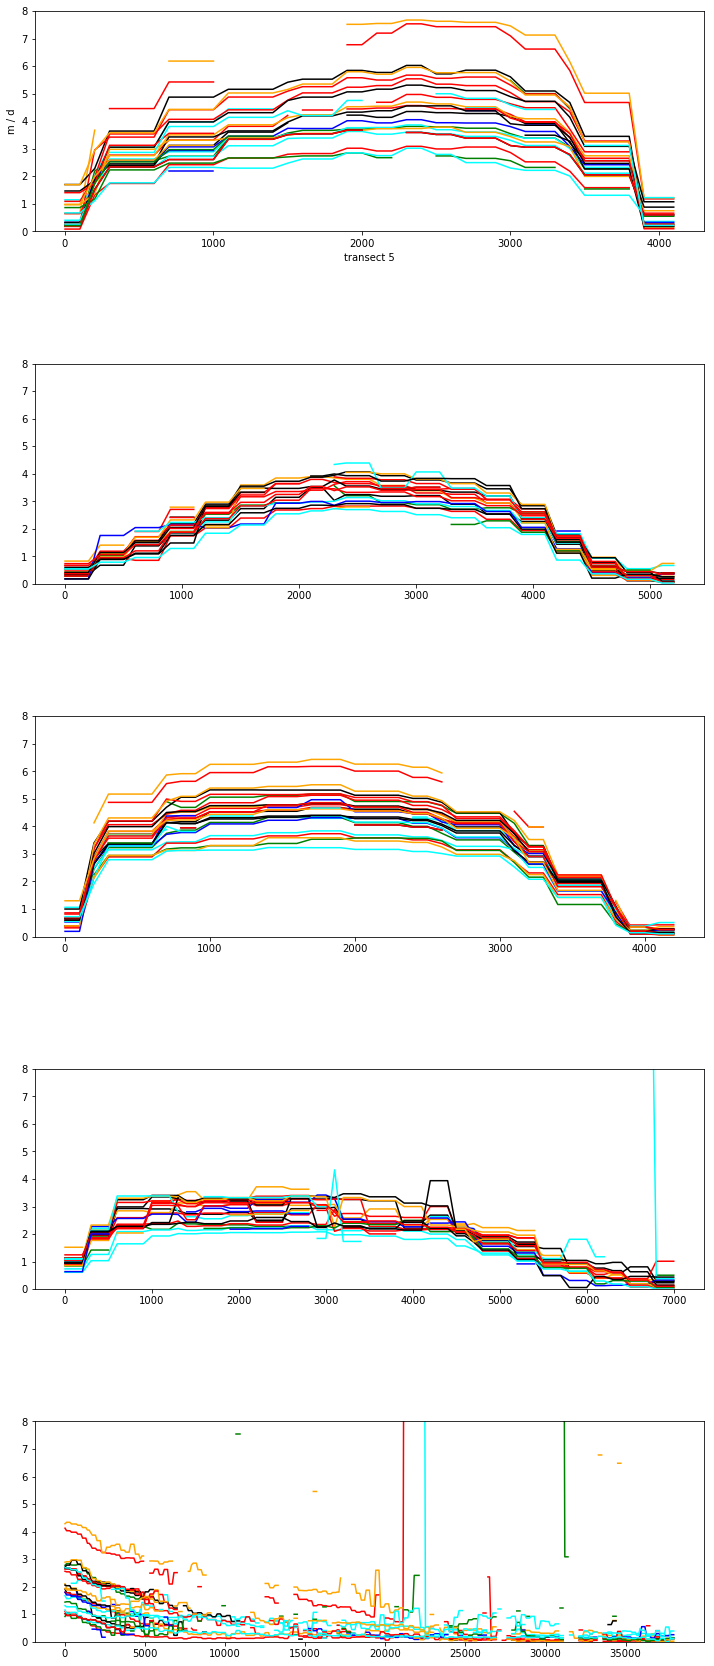

In [69]:
# Remember that n16s is how many 16-day-interval results we have; and these are m[0], ..., m[n16s - 1]
colorsequence = ['red', 'orange', 'green', 'cyan', 'blue', 'black']
ncol = len(colorsequence)
fig,axes = plt.subplots(nT, figsize=(1,1))
fig.set_size_inches(12,30)
# Don't need axes[0].axis('equal') as this is not geometry
for i in range(nT): 
    axes[i].set(ylim=(0., 8.))     # some center speeds will exceed this speed (m/d)...
    axes[0].set(xlabel='transect ' + str(i+1), ylabel = 'm / d')

# plt.subplots_adjust(bottom=-.2, top=1.2)
plt.subplots_adjust(hspace=0.6)

# plot(x-list, y-list)
x = []
y = []

# the four Seward transect charts
for t in range(nT):                           # loop over the sub-plots
    for j in range(n16s):                    # for each one loop over the number of speed results
        # uncomment to get a sense of progress: print(t, j)
        # 52 x 5 takes about two minutes...
        s = [float(m[j]['vv_masked'].sel(y = utm0[t][1] + float(i)*tp[t][1], 
                                         x = utm0[t][0] + float(i)*tp[t][0], 
                                         method = 'nearest').values) for i in range(nps[t])]
        d = [float(i)*posting for i in range(nps[t])]
        axes[t].plot(d, s, color=colorsequence[j%ncol])

# color-coded time labels for Seward transects
# This is commented out: It is useful for a small number of transects but just clutter for 52 results
# xoff=[]
# for t in range(nT):
#     for j in range(n16s):
#         axes[t].text(0, 5.5 - 0.3*j, str(year[j]) + ' ' + str(doy[j]), color=colorsequence[j%ncol])

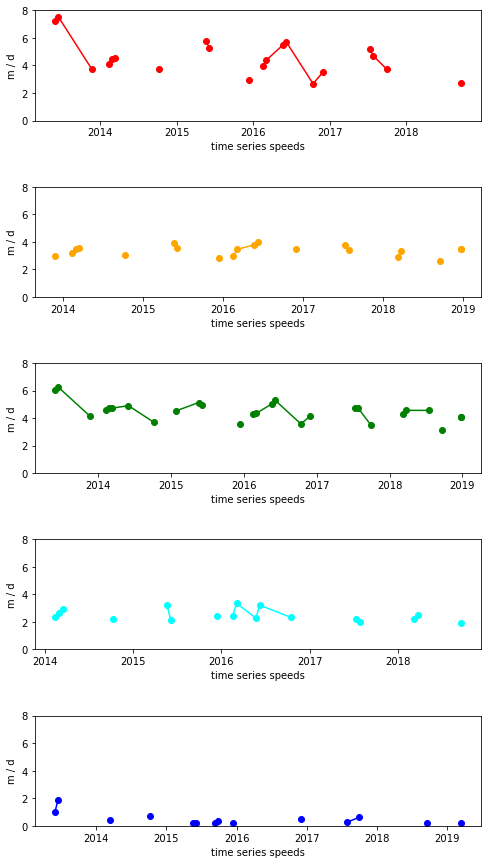

In [70]:
# Create time-series plots for speeds at just the *center* of the each transect
#   With perfect data this would be 52 datapoints per chart, one for each result. However as noted
#   the data are lossy due to clouds and so on; so the resulting charts have typically about 20 
#   results each. By widening the scope to *any* time interval (not just 16 days) we get more 
#   complete records. This is deferred to the next notebook.

# Remember that n16s is how many 16-day-interval results we have; and these are m[0], ..., m[n16s - 1]
fig,axes = plt.subplots(nT)
fig.set_size_inches(8,15)
for i in range(nT): 
    axes[i].set(ylim=(0., 8.))
    axes[i].set(xlabel='time series speeds', ylabel = 'm / d')
plt.subplots_adjust(hspace=0.6)

# flag this is bad code
x, y = [[],[],[],[],[]], [[],[],[],[],[]]

xMid = [utm0[t][0] + (nps[t]/2.)*tp[t][0] for t in range(nT)]
yMid = [utm0[t][1] + (nps[t]/2.)*tp[t][1] for t in range(nT)]

for t in range(nT): 
    for j in range(n16s):
        x[t].append(float(m[j]['image_pair_times'].mid_time_decimal_year))   # or Datetime(...mid_date)
        y[t].append(m[j]['vv_masked'].sel(y=yMid[t],x=xMid[t],method='nearest').values)
        
for i in range(nT): axes[i].plot(x[i], y[i], 'o-', color=colorsequence[i])
        


### overlaying information and adding interactivity


To verify these transects are located correctly we next draw them on the speed plot with labels.  
Further we configure sliders to control the color map range for adjustable emphasis. 
Sliders are from the ipywidgets Python package.

In [71]:
# from ipywidgets import interact
from ipywidgets import *
from traitlets import dlink

def ShowROIWithOverlays(lowerColor, upperColor):
    # Verify the transects are where we think they are
    #   cf (on xarray.plot() overlay) http://xarray.pydata.org/en/stable/auto_gallery/plot_cartopy_facetgrid.html
    p = m[0].vv_masked.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=lowerColor, vmax=upperColor) # rainbow > bwr blue-white-red
    ax = p.axes

    # the first index is the transect index: 0, 1, 2, 3
    for j in range(nT): 
        xxx = [utm0[j][0] + float(i)*tp[j][0] for i in range(nps[j])]
        yyy = [utm0[j][1] + float(i)*tp[j][1] for i in range(nps[j])]
        ax.plot(xxx, yyy, 'k')
    
    # label the transects: Positions determined by trial and error (flag this is more hardcoding)
    ax.text(525800, 6663500, '1', fontsize = '12', color='black', backgroundcolor='white', weight='bold')
    ax.text(535000, 6667000, '2', fontsize = '12', color='black', backgroundcolor='white', weight='bold')
    ax.text(527100, 6674000, '3', fontsize = '12', color='black', backgroundcolor='white', weight='bold')
    ax.text(528600, 6679000, '4', fontsize = '12', color='black', backgroundcolor='white', weight='bold')
    ax.text(528000, 6650000, 'longitudinal', fontsize = '10', color='black', backgroundcolor='white', weight='bold')

    # focus on the interesting part of the image...
    plt.xlim(480000,570000)
    plt.ylim(6630000,6694000)

interact(ShowROIWithOverlays, 
                 lowerColor=widgets.FloatSlider(min=0.00,max=5.975,step=.025,\
                                            value=0.0, continuous_update=False, readout_format='1.4f', \
                                            description='lower color'),       
                 upperColor=widgets.FloatSlider(min=0.05,max=6.0,step=.025,\
                                            value=4.0, continuous_update=False, readout_format='1.4f', \
                                            description='upper color')
        )

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='lower color', max=5.975, re…

<function __main__.ShowROIWithOverlays(lowerColor, upperColor)>

In [72]:
# minimum to maximum reasonable speeds range about 0 to 10 meters per day
# mspeed[0:20,0:20].values gives lots of nans
# a=mspeed[400:410,600:610]
# print(a.values)
# print(~np.isnan(a).values)

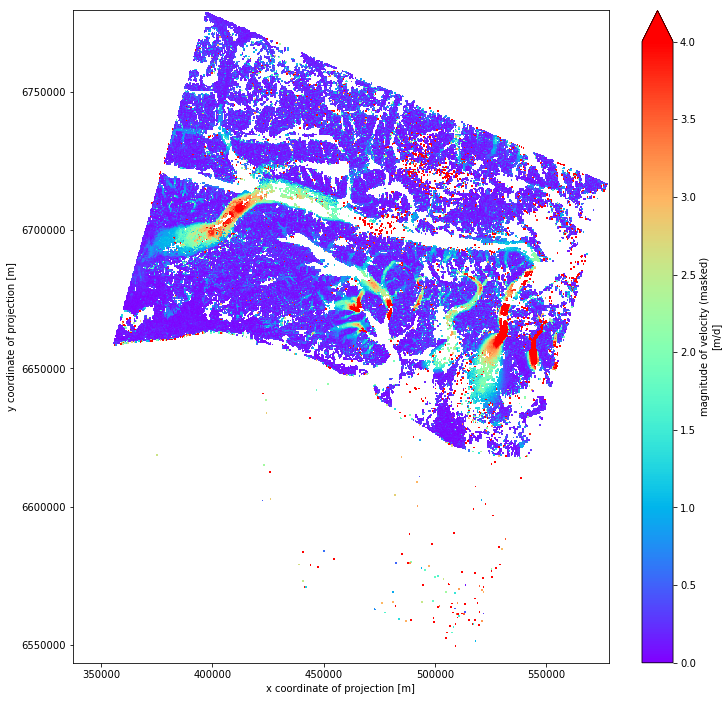

In [73]:
from numpy import isnan

# masked speed, entire image
speed=m[0].vv_masked              # _masked: corr and del_corr thresholds applied; not the lgo mask (land/glacier/ocean)
speed.plot(figsize=(12,12),cmap=plt.cm.rainbow,vmin=0.0, vmax=4.0)

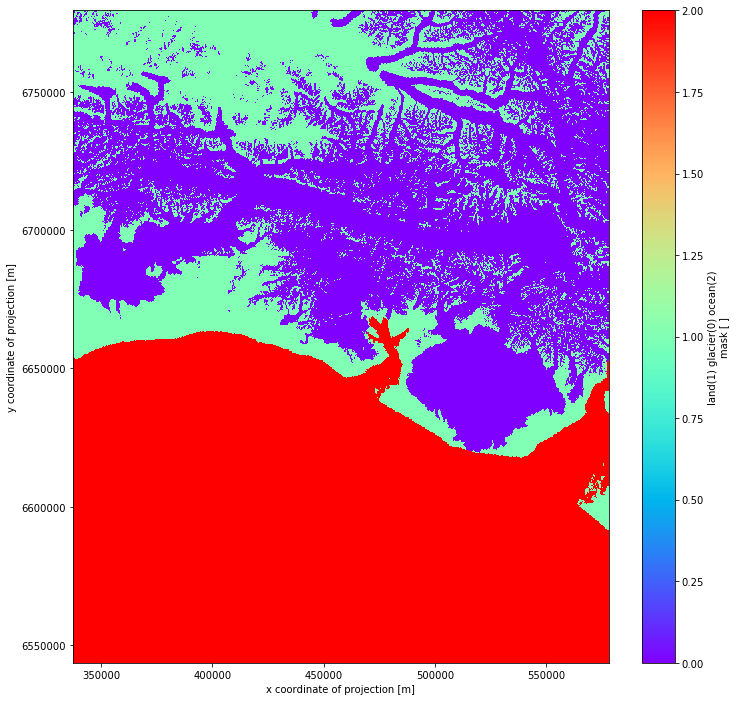

In [74]:
# land / glacier / ocean mask
lgo=m[0].lgo_mask
lgo.plot(figsize=(12,12),cmap=plt.cm.rainbow,vmin=0.0, vmax=2.0)

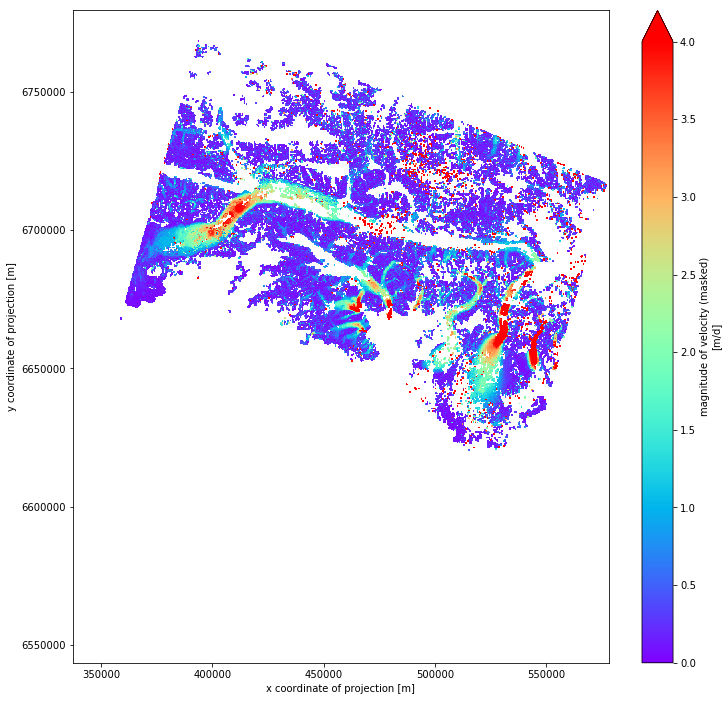

In [75]:
# redact the speed field by applying the lgo mask
mspeed=speed.where(lgo == 0.)        # mspeed is shorthand for masked speed, i.e. masked now by lgo_mask
mspeed.plot(figsize=(12,12),cmap=plt.cm.rainbow,vmin=0.0, vmax=4.0)

<class 'xarray.core.dataarray.DataArray'> <class 'xarray.core.dataarray.DataArray'>
True


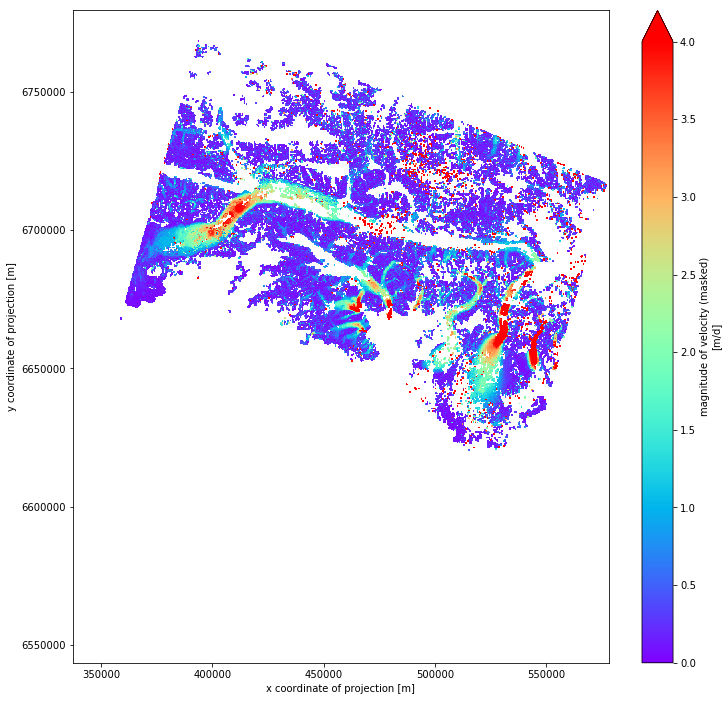

In [76]:
# The next line is intended to filter out NaN values but as you can see tmp1 == mspeed so it does nothing
tmp1 = mspeed.where(~isnan(mspeed))
tmp1.plot(figsize=(12,12),cmap=plt.cm.rainbow,vmin=0.0, vmax=4.0)
print(type(mspeed), type(tmp1))           # both DataArrays
print(tmp1.equals(mspeed))                # True, meaning they are equal

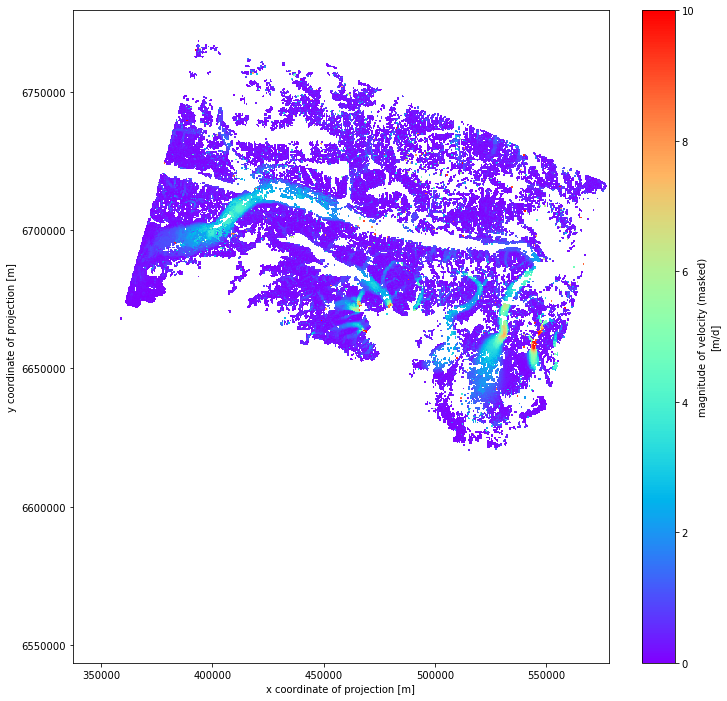

In [77]:
# for comparison: out_vec = out_vec[~numpy.isnan(out_vec)] 
np.warnings.filterwarnings('ignore')            # numpy is throwing a warning because of the NaN values
topspeed = 10.0                                 # meters per day... 6 is probably more physically realistic
mbspeed = tmp1.where(tmp1 < topspeed)           # mbspeed is shorthand for masked, bounded speed
mbspeed.plot(figsize=(12,12),cmap=plt.cm.rainbow,vmin=0.0, vmax=topspeed)

Histograms showing (right) application of lgo_mask and speed bounds to vv_masked speed (left).
  A couple thousand points with speeds above five meters per day are culled to 500 or so...
  A hundred thousand or so data values are discarded with low-speed.


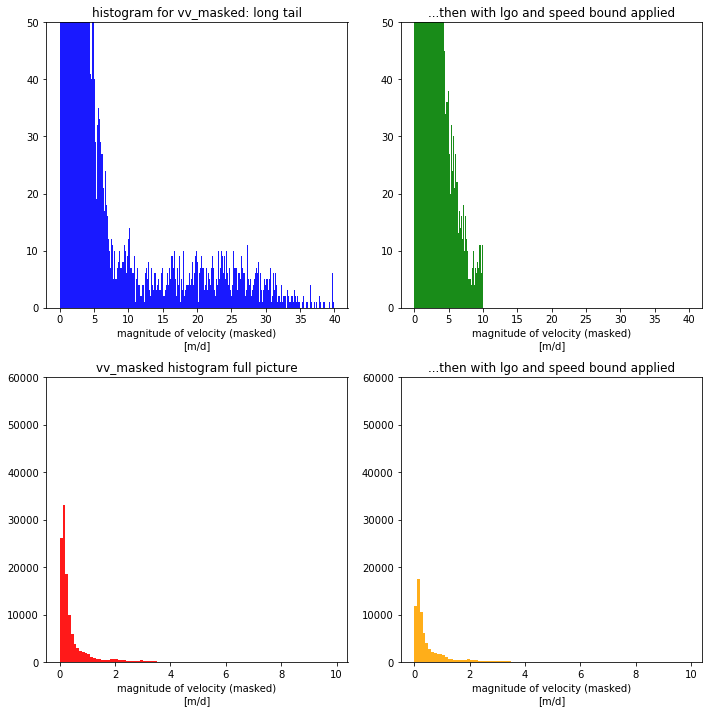

In [78]:
# Let's use the histogram feature of DataArrays (or maybe xarray nDarrays? pandas?...) 
# to view two aspects of speed versus mbspeed side-by-side
#   First how does the long tail of very high speeds compare? 
#   Second how does the mask + bound process curtail mspeed for the bulk of the (< 1 m/d) data?
# 
# This cell also accomplishes something very important (difficult to discern) in the plotting
#   tutorial: It takes the native 'hist' method of the DataArray and combines that with a 
#   subplot layout. Notice that the subplots are 2 x 2 and the corresponding axes are 
#   indexed [0,1] etcetera. These axes are assigned to the histogram inside the .plot.hist()
#   call native to DataArrays 'speed' and 'mbspeed'. 
# 
fig,axes = plt.subplots(2, 2, tight_layout=True, figsize=(10,10))

hinc = 0.1               # histogram increment
s0 = 0.                  # low-end speed
big_s1 = 40.             # high-end speed for the low-count histogram (upper row)
small_s1 = 10.           # high-end speed for the high-count histogram (lower row)
small_hi_count = 50.     # max for y-range on the low-count histogram
big_hi_count = 60000.    # max for y-range on the high-count histogram

speed.plot.hist(ax=axes[0,0], bins=np.arange(s0,big_s1,hinc), alpha=0.9, color='blue')
mbspeed.plot.hist(ax=axes[0,1], bins=np.arange(s0,big_s1,hinc), alpha=0.9, color='green')
speed.plot.hist(ax=axes[1,0], bins=np.arange(s0,small_s1,hinc), alpha=0.9, color='red')
mbspeed.plot.hist(ax=axes[1,1], bins=np.arange(s0,small_s1,hinc), alpha=0.9, color='orange')
axes[0,0].set(ylim=(0., small_hi_count))
axes[0,1].set(ylim=(0., small_hi_count))
axes[1,0].set(ylim=(0., big_hi_count))
axes[1,1].set(ylim=(0., big_hi_count))
axes[0,0].set(title='histogram for vv_masked: long tail')
axes[0,1].set(title='...then with lgo and speed bound applied')
axes[1,0].set(title='vv_masked histogram full picture')
axes[1,1].set(title='...then with lgo and speed bound applied')

print('Histograms showing (right) application of lgo_mask and speed bounds to vv_masked speed (left).')
print('  A couple thousand points with speeds above five meters per day are culled to 500 or so...')
print('  A hundred thousand or so data values are discarded with low-speed.')


#### conclusions for this notebook

On mechanics...


- We have here steps in data retrieval (to the local environment), unpacking and charting
- The approach used was typical of former, not current practice
  - Each data file was mapped to a separate xarray Dataset as a list
  - The data used were from a single path-row frame from LANDSAT-8
  - The data used were 16-day time interval only (not 32, 48, 64, 80, 96 day)
  - The analysis concerned only a small set of locations: 5 transects 
  - The next notebook will improve on these restrictions
- Data are noisy but are susceptible to filtering schemes as the above histograms demonstrate


On glaciology...

- Glacier speed seasonal variability is suggested by the data
- Lateral transects on Seward and the longitudinal profile of Malaspina appear reasonable; with some noise 
- Seward shows longitudinal variability in speed
- An 'agenda item' is to move from glacier-scale inquiry' to regional scale

